# Project 1b - Logbook 4/9-16
The general algorithm for solving our tridiagonal system has been coded (task b in project) and it has been run with grid sizes of 10x10, 100x100 and 1000x1000. These files are in the results/ folder of the project. The source code can be found in the project1/ folder. We will here plot the results, and compare them with the closed form solution: $u(x) = 1-(1-e^{-10})x-e^{-10x}$

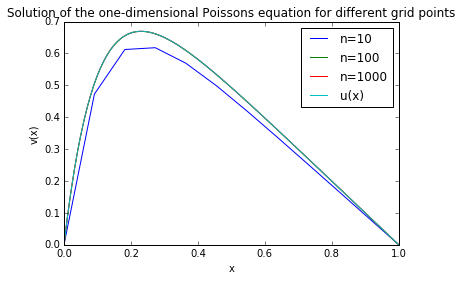

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to read data from results files
def read_data(filename, x, u):
    "docstring"
    f = open(filename, 'r');
    # Read the 6 header lines
    for i in range(0,6):
        header1 = f.readline()
    
    # Read data into respective vectors
    i=1
    for line in f:
        line = line.strip()
        columns = line.split()
        x.append(float(columns[0]))
        v.append(float(columns[1]))
        i=i+1
    f.close()
    return

u = []
x_u = []
# Calculate the closed form solution with 1000 grid points
n=1000
h = 1.0/(n+1.0)
for i in range(0,n+1):
    x_u.append(i*h)
    #print x_u[i]
    u.append(1.0-(1.0-math.exp(-10.0))*x_u[i]-math.exp(-10.0*x_u[i]));
    
#print u

# Plot data in a loop
for n in [10,100,1000]:
    # Initialize vectors before reading data
    x = []
    v = []
    # Read data
    read_data('../results/data_n'+str(n)+'.dat',x,u)
    # Plot
    plt.plot(x,v)

plt.plot(x_u,u)
plt.legend(['n=10','n=100','n=1000','u(x)'])
plt.title('Solution of the one-dimensional Poissons equation for different grid points')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.show()

## Floating point operations

For the general algorithm coded in (b), assuming that the diagonal and non-diagonal elements have non-equal values, we have 6 floating point operations for every loop in the forward substitution, and 1 floating point operation in the backward substitution. The forward loop goes from i=2->n, while the backward substitution goes from i=n-1->1, leading to n+1 and n-1 loops respectively. The total number of floating point operations are then given as,
$$ O(n)=(n+1)6+(n-1) $$